In [2]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
path = "../../results/halos_disk.npy"
matches = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df = pd.DataFrame(list(matches))

In [ ]:
path = "../../results/halos_nodisk.npy"
matches2 = np.load(path, allow_pickle=True)

In [7]:
df

halo_TNG50-1  Mvir_TNG50-1  Rvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  \
0               3   3470.526367    663.229126             3   3491.555176   
1               3   3470.526367    663.229126             3   3491.555176   
2               3   3470.526367    663.229126             3   3491.555176   
3               3   3470.526367    663.229126             3   3491.555176   
4               3   3470.526367    663.229126             3   3491.555176   
..            ...           ...           ...           ...           ...   
372             0  15167.142578   1084.325806             0  15079.097656   
373             2   5243.999512    761.067261             2   5181.124023   
374             2   5243.999512    761.067261             2   5181.124023   
375             2   5243.999512    761.067261             2   5181.124023   
376             2   5243.999512    761.067261             2   5181.124023   

     Rvir_TNG50-3       dist     dMvir  subhalo_TNG50-1  
0      664.569702  21.662817  0.006059           117251  
1      664.569702  21.662817  0.006059           117254  
2      664.569702  21.662817  0.006059           117255  
3      664.569702  21.662817  0.006059           117256  
4      664.569702  21.662817  0.006059           117257  
..            ...        ...       ...              ...  
372   1082.225708  18.185898 -0.005805                8  
373    758.016785  15.415857 -0.011990            96763  
374    758.016785  15.415857 -0.011990            96765  
375    758.016785  15.415857 -0.011990            96773  
376    758.016785  15.415857 -0.011990            96774  

[377 rows x 9 columns]

In [24]:
#search for the cases where the id in TNG50-1 is different from id in TNG50-3
mismatches = df[df['halo_TNG50-3'] != df['halo_TNG50-1']]
mismatches

halo_TNG50-1  Mvir_TNG50-1  Rvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  \
56              8   2301.364258    578.342468             9   2389.316162   
57              8   2301.364258    578.342468             9   2389.316162   
58              8   2301.364258    578.342468             9   2389.316162   
59              8   2301.364258    578.342468             9   2389.316162   
60              8   2301.364258    578.342468             9   2389.316162   
..            ...           ...           ...           ...           ...   
353           105    195.640350    254.297440            93    234.575790   
354           106    174.405029    244.740448         64034      0.000000   
355           106    174.405029    244.740448         64034      0.000000   
356           106    174.405029    244.740448         64034      0.000000   
357           107    182.164703    248.313385           106    195.420303   

     Rvir_TNG50-3        dist     dMvir  subhalo_TNG50-1  
56     585.628357    6.046039  0.038217           208812  
57     585.628357    6.046039  0.038217           208813  
58     585.628357    6.046039  0.038217           208814  
59     585.628357    6.046039  0.038217           208815  
60     585.628357    6.046039  0.038217           208817  
..            ...         ...       ...              ...  
353    270.165710   16.813278  0.199015           471249  
354      0.000000  188.026016 -1.000000           471996  
355      0.000000  188.026016 -1.000000           471997  
356      0.000000  188.026016 -1.000000           471998  
357    254.207230    7.805748  0.072767           472548  

[252 rows x 9 columns]

In [27]:
#sacar la tabla ordenada por dMvir de mayor a menor en valor absoluto
mismatches = mismatches.reindex(mismatches['dMvir'].abs().sort_values(ascending=False).index)
#dropear los que tienen indice repetido
mismatches = mismatches.drop_duplicates(subset=['halo_TNG50-1', 'halo_TNG50-3'])
mismatches.head(20)

halo_TNG50-1  Mvir_TNG50-1  Rvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  \
354           106    174.405029    244.740448         64034      0.000000   
330            94    107.666786    208.399811        114088      0.074702   
220            51    231.674332    269.035797            58    296.326294   
305            83    262.491943    280.481140            64    325.151917   
342            99    200.465546    256.373505            66    242.333115   
353           105    195.640350    254.297440            93    234.575790   
319            89    131.496735    222.764160            72    157.436691   
266            68    239.157501    271.912537            37    285.989410   
185            40    440.302643    333.257812            38    521.961182   
310            86    189.143021    251.451385            76    223.174408   
285            77    144.165161    229.684479            82    168.849747   
166            33    532.261108    355.002075            30    622.159851   
336            95    184.641510    249.438416           113    153.458817   
251            63    240.709930    272.487701            61    280.055267   
261            67    175.494873    245.250839            79    204.151093   
176            37    369.825562    314.426270            39    427.983795   
308            85    127.916367    220.716385            86    147.361267   
225            53    373.377991    315.430237            52    429.970398   
218            50    303.785400    294.480225            49    349.668152   
313            87    241.873016    272.926147            74    278.225067   

     Rvir_TNG50-3        dist     dMvir  subhalo_TNG50-1  
354      0.000000  188.026016 -1.000000           471996  
330     18.449360  198.126404 -0.999306           459557  
220    292.051880   23.143713  0.279064           402556  
305    301.219788   31.940712  0.238712           447914  
342    273.113220   30.944105  0.208852           465255  
353    270.165710   16.813278  0.199015           471249  
319    236.541718   10.836608  0.197267           454172  
266    288.613831   50.977692  0.195820           429474  
185    352.706238   29.200418  0.185460           379804  
310    265.705719   11.069927  0.179924           450916  
285    242.116562   19.763586  0.171224           440407  
166    373.962006   21.236485  0.168900           362998  
336    234.523834   91.259796 -0.168882           460725  
251    286.592255    6.903917  0.163455           422754  
261    257.935577   10.186522  0.163288           428177  
176    330.113098    9.503321  0.157259           372755  
308    231.370102   17.686195  0.152013           449659  
225    330.634247   43.008720  0.151569           406941  
218    308.602753   17.847605  0.151037           400975  
313    285.967468   11.181894  0.150294           452032

In [16]:
# Convertir a DataFrame
df2 = pd.DataFrame(list(matches2))

In [17]:
#filtrar por halos con masa mayor a 1 en TNG50-1

df2 = df2[df2['Mvir_TNG50-1'] > 0]

/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


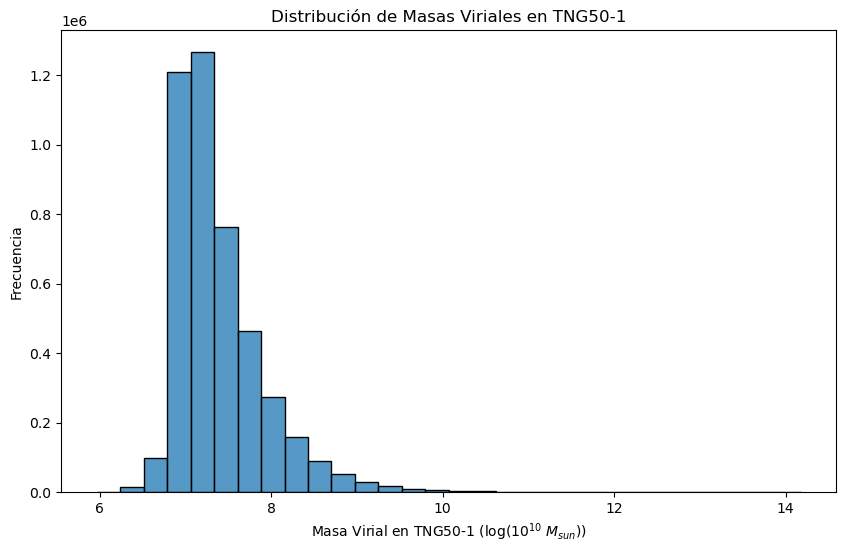

In [18]:
#histograma de masas viriales en TNG50-1 tanto para los casos con disco como sin disco juntos
plt.figure(figsize=(10,6))
#juntar los dos dataframes
df_combined = pd.concat([df, df2])
#solo graficar la masa de halos unicos en TNG50-1 (es decir que no se repitan los halos con mismo id)
df_combined = df_combined.drop_duplicates(subset=['halo_TNG50-1'])
#graficar histograma de la columna Mvir_TNG50-1
sns.histplot(np.log10(df_combined['Mvir_TNG50-1']*10**10), bins=30)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Frecuencia')
#plt.yscale('log')
plt.title('Distribución de Masas Viriales en TNG50-1')

plt.show()

/home/andres/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de Masas Viriales en TNG50-3')

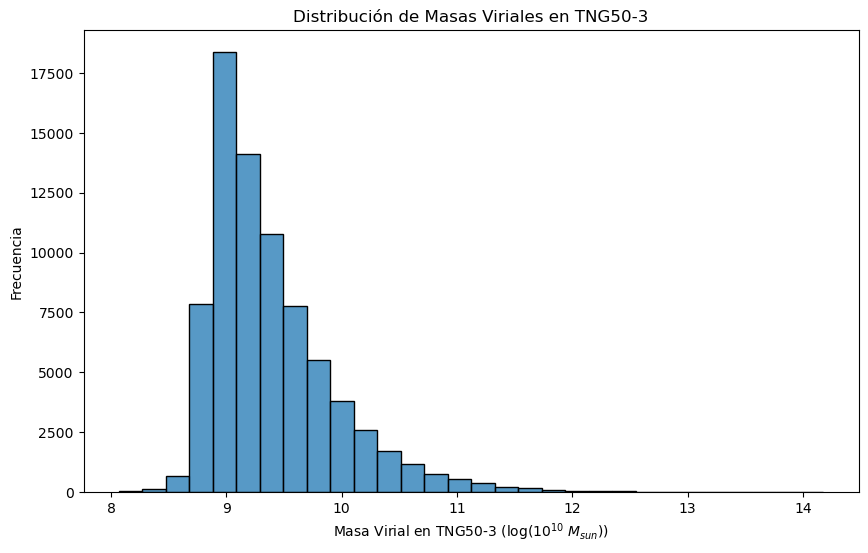

In [19]:
#histograma de masas viriales en TNG50-1 tanto para los casos con disco como sin disco juntos
plt.figure(figsize=(10,6))
#juntar los dos dataframes
df_combined = pd.concat([df, df2])
#solo graficar la masa de halos unicos en TNG50-1 (es decir que no se repitan los halos con mismo id)
df_combined = df_combined.drop_duplicates(subset=['halo_TNG50-3'])
#graficar histograma de la columna Mvir_TNG50-3
sns.histplot(np.log10(df_combined['Mvir_TNG50-3']*10**10), bins=30)
plt.xlabel('Masa Virial en TNG50-3 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Frecuencia')
plt.title('Distribución de Masas Viriales en TNG50-3')

/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andres/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andres/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


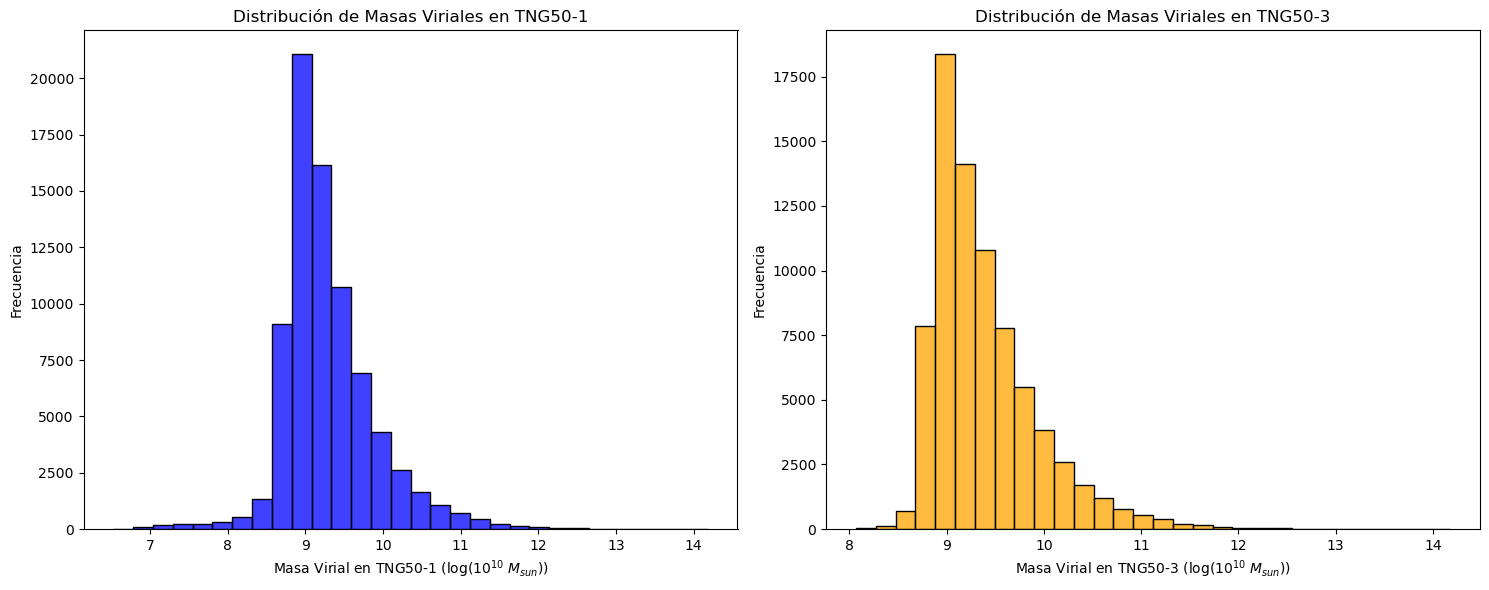

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Graficar histograma de la columna Mvir_TNG50-1
sns.histplot(np.log10(df_combined['Mvir_TNG50-1']*10**10), bins=30,
                ax=axs[0], color='blue')
axs[0].set_xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Masas Viriales en TNG50-1')

# Graficar histograma de la columna Mvir_TNG50-3
sns.histplot(np.log10(df_combined['Mvir_TNG50-3']*10**10), bins=30,
                ax=axs[1], color='orange')
axs[1].set_xlabel('Masa Virial en TNG50-3 (log($10^{10}$ $M_{sun}$))')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Masas Viriales en TNG50-3')
plt.tight_layout()
plt.show()

In [ ]:
delta x y z como funcion de la masa del halo y la distancia como funcion de la masa del halo

In [29]:
df_combined.head()

halo_TNG50-1  Mvir_TNG50-1  Rvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  \
0              3   3470.526367    663.229126           3.0   3491.555176   
18             0  15167.142578   1084.325806           0.0  15079.097656   
19             4   3142.989746    641.643616           4.0   3239.478027   
34             5   1859.250610    538.640137           5.0   1816.254150   
42             6   3027.909180    633.734619           6.0   3017.573486   

    Rvir_TNG50-3       dist     dMvir  subhalo_TNG50-1  
0     664.569702  21.662817  0.006059         117251.0  
18   1082.225708  18.185898 -0.005805             11.0  
19    648.165588  34.863636  0.030700         143881.0  
34    534.463318  25.674623 -0.023126         167393.0  
42    633.013000  12.991139 -0.003413         184932.0

In [28]:
#ordenar por dMvir de mayor a menor en valor absoluto df_combined
df_combined = df_combined.reindex(df_combined['dMvir'].abs().sort_values(ascending=False).index)
df_combined.head(30)

ValueError: cannot reindex on an axis with duplicate labels